True Positive Rate (TPR): 0.8059508408796895
False Positive Rate (FPR): 0.2712082262210797
False Negative Rate (FNR): 0.19404915912031048
True Negative Rate (TNR): 0.7287917737789203
Accuracy: 0.7672469374597034
Precision: 0.7470023980815348
F1 Score: 0.7753578095830741
Log Loss: 0.6253311271166986
ROC AUC Score: 0.8563445927295583
Recall 0.8059508408796895


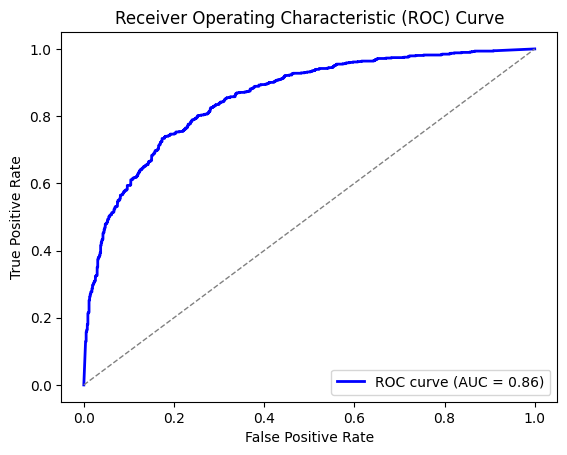

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, log_loss, recall_score
import matplotlib.pyplot as plt

# Read the data
train_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\TRAINING_DATASET.csv")
test_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\TESTING_DATASET.csv")

# Shuffle train_data and test_data
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)
test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and target variable
X_train = train_data.drop(columns=["CLASS"])
y_train = train_data["CLASS"]
X_test = test_data.drop(columns=["CLASS"])
y_test = test_data["CLASS"]

# Identify categorical and numerical columns
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Fit and transform the training data
preprocessor.fit(X_train)
X_train_encoded = preprocessor.transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Define the best parameters
best_params = {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

# Initialize the KNN classifier with the best parameters
best_knn_classifier = KNeighborsClassifier(**best_params)

# Train the KNN classifier
best_knn_classifier.fit(X_train_encoded, y_train)

# Predictions on the test data
y_test_pred = best_knn_classifier.predict(X_test_encoded)
y_test_pred_prob = best_knn_classifier.predict_proba(X_test_encoded)

conf_matrix = confusion_matrix(y_test, y_test_pred)

TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
logloss = log_loss(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob[:, 1])
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
TNR = TN / (TN + FP)

print("True Positive Rate (TPR):", TPR)
print("False Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)
print("True Negative Rate (TNR):", TNR)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("ROC AUC Score:", roc_auc)
print("Recall", recall)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob[:, 1])
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Confusion Matrix:
[[567 211]
 [150 623]]


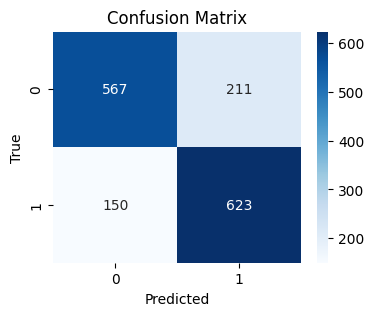

In [2]:
import seaborn as sns
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(4, 4))  # Adjust the figsize as needed
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [2]:
new_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\NEW_TESTING.csv")
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Aspect', 'Curvature', 'Dist_from_Lineaments',
                                  'Slope', 'SPI', 'TRI']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Geomorphology', 'Soil', 'Lithology',
                                  'LULC'])])

In [3]:
X_new_encoded = preprocessor.transform(new_data)

In [4]:
y_pred_prob_new = best_knn_classifier.predict_proba(X_new_encoded)

In [5]:
import pandas as pd

prob_df = pd.DataFrame(y_pred_prob_new, columns=['Probability_class_0', 'Probability_class_1'])

new_data_with_prob = pd.concat([new_data, prob_df], axis=1)

new_data_with_prob.to_csv('knnlulc3_method_with_probabilities.csv', index=False)

In [3]:
new_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\ls_merge_data.csv")
preprocessor.fit(X_train)

X_new_encoded = preprocessor.transform(new_data)
y_pred_prob_new = best_knn_classifier.predict_proba(X_new_encoded)

import pandas as pd

prob_df = pd.DataFrame(y_pred_prob_new, columns=['Probability_class_0', 'Probability_class_1'])

new_data_with_prob = pd.concat([new_data, prob_df], axis=1)

new_data_with_prob.to_csv('knnls_merge_method_with_probabilities.csv', index=False)